In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Estilos de Seaborn
sns.set()
sns.set_palette(palette='colorblind')

In [325]:
def autolabel_pct(pct):
    return "{:.1f}%".format(pct)

def autolabel_height(grafico, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for bar in grafico.patches:
        height = bar.get_height()
        grafico.text(bar.get_x() + bar.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


In [ ]:
events = pd.read_csv("events.csv", parse_dates=["date"])

clicks = pd.read_csv("clicks.csv", parse_dates = ["created"])

In [3]:
clicks["created"] = clicks["created"].astype("datetime64[ns]")

In [ ]:
events.to_pickle("events pickle")

In [5]:
clicks.to_pickle("clicks pickle")

In [326]:
events = pd.read_pickle("events pickle")
clicks = pd.read_pickle("clicks pickle")

In [4]:
clicks.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash'],
      dtype='object')

In [4]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


# Analisis - Events: 

In [67]:
columnas_events= ["date","event_id","event_uuid","kind","ref_type","ref_hash","application_id","attributed"
                  ,"device_brand","device_model","device_language","device_city","carrier","device_os","wifi","connection_type"]

In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  datetime64[ns]
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  object
connection_type       object
ip_address            int64
device_language       float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(6), object(4)
memory usage: 402.0+ MB


In [43]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


## Eventos

### ¿Cuántos tipos de eventos distintos hay?

In [8]:
events["event_id"].nunique()

568

In [68]:
events["event_uuid"].nunique()

2489324

In [49]:
events["kind"].nunique()

583

In [68]:
events["kind"].isnull().sum()

5099

## ¿Cuántos eventos atribuidos?

Text(0.5, 0.98, 'Comparacion de eventos atribuidos')

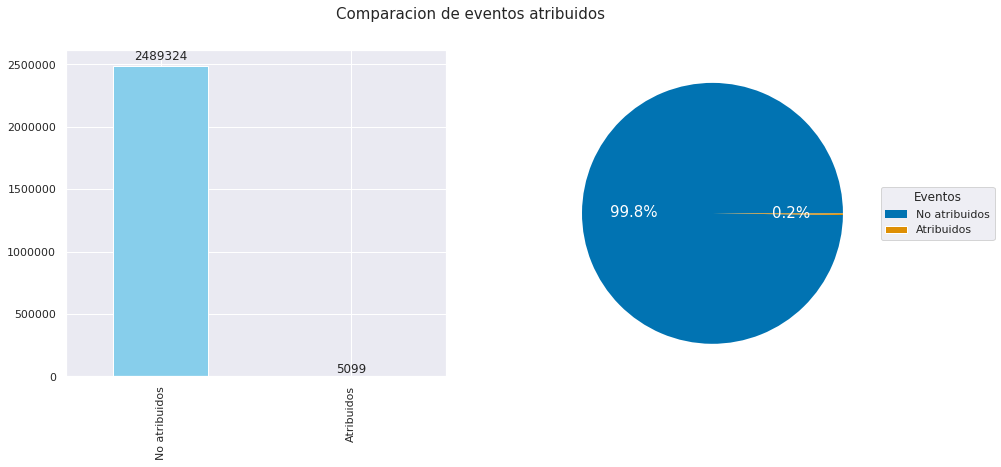

In [374]:
fig, ejes = plt.subplots(nrows = 1,ncols = 2, figsize = (15,6), )
ax1 = ejes[0]
ax2 = ejes[1]

datos = events["attributed"].value_counts()
labels = ["No atribuidos", "Atribuidos"]

graf_barras = datos.plot(kind = "bar",color = "SkyBlue",ax=ax1)
ax1.set_xticklabels(labels)
ax1.set_ylabel = "Cantidad de Eventos"
ax1.set_xlabel = "Eventos"
autolabel_height(graf_barras)

porc,text,autotext = ax2.pie(datos, autopct = autolabel_pct)

for p in porc:
    p.set_linewidth(0)
    p.set_edgecolor("Orange")

for t in autotext:
    t.set_fontsize(15)
    t.set_color("white")
    

ax2.legend(graf_torta[0], labels,
          title="Eventos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1))

fig.suptitle("Comparacion de eventos atribuidos",fontsize = 15)


## ¿Cuales son los eventos más presentes?

In [334]:
events_os = events.groupby(["event_id","ref_type"]).count().reset_index()\
      .pivot("event_id","ref_type","ref_hash")\

In [335]:
events_os["total"] = events_os.sum(axis=1)

events_os = events_os.nlargest(10, columns = "total")

In [336]:
events_os.reset_index(inplace=True)

In [337]:
events_os

ref_type,event_id,1494519392962156891,1891515180541284343,total
0,22,36674.0,581554.0,618228.0
1,31,100200.0,316870.0,417070.0
2,161,49647.0,168199.0,217846.0
3,1,69498.0,88314.0,157812.0
4,138,9945.0,90094.0,100039.0
5,162,45053.0,39845.0,84898.0
6,329,14623.0,41867.0,56490.0
7,156,18634.0,34698.0,53332.0
8,33,25976.0,22605.0,48581.0
9,171,7681.0,36261.0,43942.0


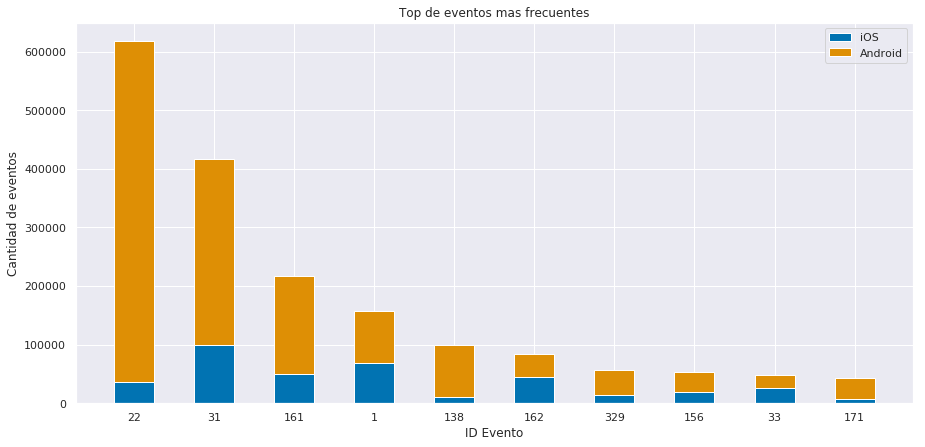

In [338]:
N = 10
os_1 = events_os.iloc[:,1]
os_2 = events_os.iloc[:,2]

label_ev = events_os["event_id"]
label_os = events["ref_type"].nunique()

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(15,7))

ax =fig.gca()
p1 = plt.bar(ind, os_1, width)
p2 = plt.bar(ind, os_2, width, bottom=os_1 )


plt.ylabel('Cantidad de eventos')
plt.xlabel('ID Evento')
plt.title('Top de eventos mas frecuentes')
plt.xticks(ind, label_ev)
plt.legend((p1[0], p2[0]), ("iOS","Android"))

#autolabel_height(ax)
plt.show()


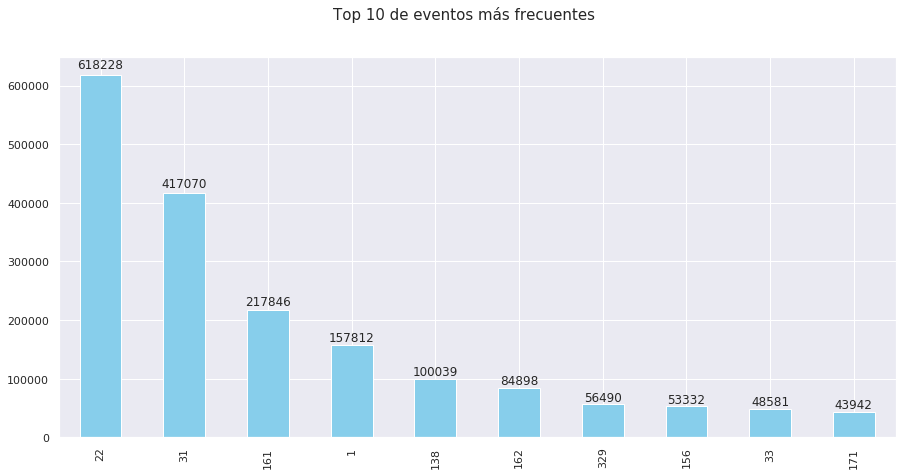

In [339]:
fig, ax1 = plt.subplots( figsize = (15,7), )

datos = events["event_id"].value_counts().head(10)
graf_barras = datos.plot(kind = "bar",color = "SkyBlue",ax=ax1)

fig.suptitle("Top 10 de eventos más frecuentes",fontsize = 15)
autolabel_height(graf_barras)

## Eventos más frecuentes categorizados por wifi

In [340]:
events_wifi = events.groupby(["event_id","wifi"]).count().reset_index()\
                  .pivot("event_id","wifi","ref_hash")\

events_wifi["total"] = events_wifi.sum(axis=1)

events_wifi = events_wifi.nlargest(10, columns = "total")

events_wifi.reset_index(inplace=True)

In [341]:
events_wifi

wifi,event_id,False,True,total
0,22,255661.0,362567.0,618228.0
1,31,41250.0,73213.0,114463.0
2,138,4740.0,95299.0,100039.0
3,156,16567.0,36757.0,53324.0
4,33,11679.0,28213.0,39892.0
5,155,11931.0,26534.0,38465.0
6,273,7808.0,29248.0,37056.0
7,23,7189.0,28399.0,35588.0
8,21,4604.0,21624.0,26228.0
9,98,1131.0,23165.0,24296.0


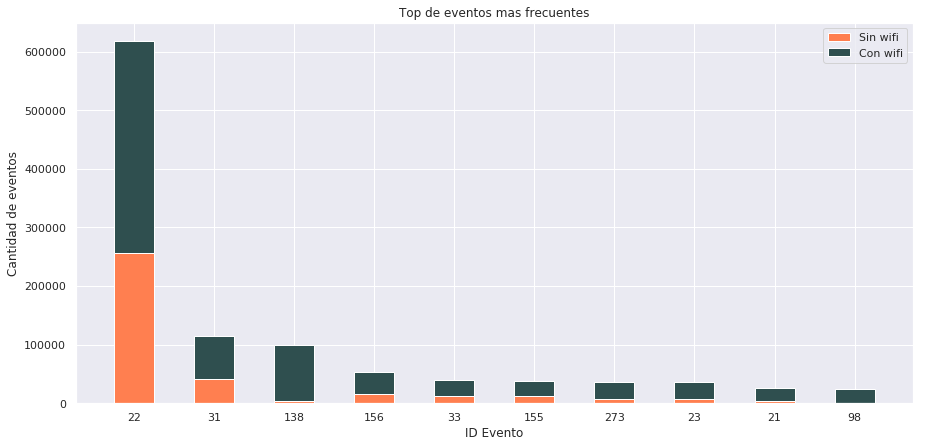

In [379]:
N = 10
group_1 = events_wifi.iloc[:,1]
group_2 = events_wifi.iloc[:,2]

label_ev = events_wifi["event_id"]

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(15,7))

ax =fig.gca()
p1 = plt.bar(ind, group_1, width,color = "Coral")
p2 = plt.bar(ind, group_2, width, bottom=group_1, color= "Darkslategray")


plt.ylabel('Cantidad de eventos')
plt.xlabel('ID Evento')
plt.title('Top de eventos mas frecuentes')
plt.xticks(ind, label_ev)
plt.legend((p1[0], p2[0]), ("Sin wifi","Con wifi"))

#autolabel_height(ax)
plt.show()


## Eventos más frecuentes categorizados por conexion

In [343]:
events_connect = events.groupby(["event_id","connection_type"]).count().reset_index()\
                  .pivot("event_id","connection_type","ref_hash")\

events_connect["total"] = events_connect.sum(axis=1)

events_connect = events_connect.nlargest(10, columns = "total")

events_connect.reset_index(inplace=True)

In [344]:
events_connect.fillna(0,inplace = True)

In [345]:
events_connect

connection_type,event_id,Cable/DSL,Cellular,Corporate,total
0,161,95676.0,122002.0,0.0,217678.0
1,1,84459.0,66856.0,2.0,151317.0
2,162,40355.0,44481.0,0.0,84836.0
3,310,31569.0,10499.0,0.0,42068.0
4,80,13831.0,8164.0,0.0,21995.0
5,81,11694.0,6878.0,0.0,18572.0
6,33,5532.0,3146.0,0.0,8678.0
7,40,5769.0,2523.0,0.0,8292.0
8,189,5352.0,2581.0,1.0,7934.0
9,41,5512.0,1809.0,0.0,7321.0


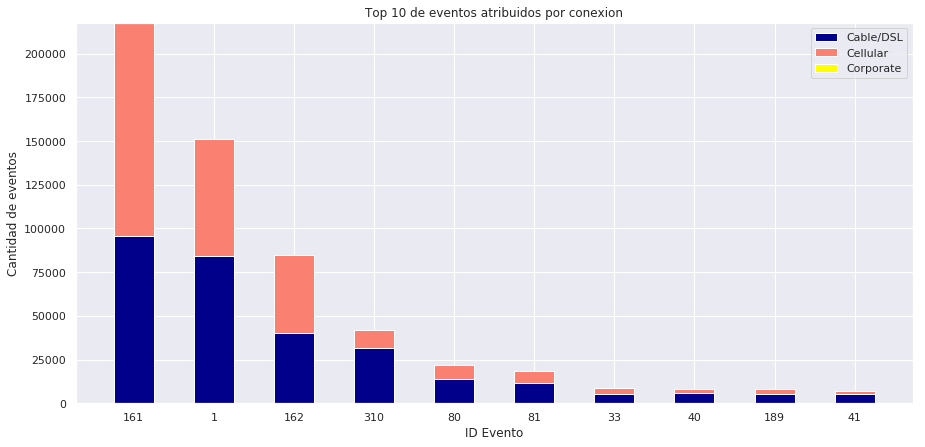

In [403]:
N = 10
group_1 = events_connect.iloc[:,1]
group_2 = events_connect.iloc[:,2]
group_3 = events_connect.iloc[:,3]

label_ev = events_connect["event_id"]

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(15,7))

ax =fig.gca()
p1 = plt.bar(ind, group_1, width,color = "Darkblue")
p2 = plt.bar(ind, group_2, width, bottom=group_1, color= "Salmon")
p3 = plt.bar(ind, group_3, width, bottom= group_1+group_2, color = "Yellow")


plt.ylabel('Cantidad de eventos')
plt.xlabel('ID Evento')
plt.title('Top 10 de eventos atribuidos por conexion')
plt.xticks(ind, label_ev)
plt.legend((p1[0], p2[0],p3[0]), ("Cable/DSL","Cellular","Corporate"))

#autolabel_height(ax)
plt.show()

# Eventos atribuidos

## ¿Cuales son los eventos más atribuidos?

In [381]:
attributed_os= events.groupby(["event_id","ref_type"])["attributed"]\
                  .sum()\
                  .reset_index()\
                  .pivot("event_id","ref_type","attributed")\

In [382]:
attributed_os["total"] = attributed_os.sum(axis=1)

attributed_os = attributed_os.nlargest(10, columns = "total").fillna(0)

In [383]:
attributed_os.reset_index(inplace=True)

In [384]:
attributed_os

ref_type,event_id,1494519392962156891,1891515180541284343,total
0,31,41.0,1515.0,1556.0
1,513,0.0,1004.0,1004.0
2,156,114.0,470.0,584.0
3,155,121.0,277.0,398.0
4,158,49.0,245.0,294.0
5,133,85.0,129.0,214.0
6,41,0.0,213.0,213.0
7,1,49.0,121.0,170.0
8,40,0.0,129.0,129.0
9,204,0.0,100.0,100.0


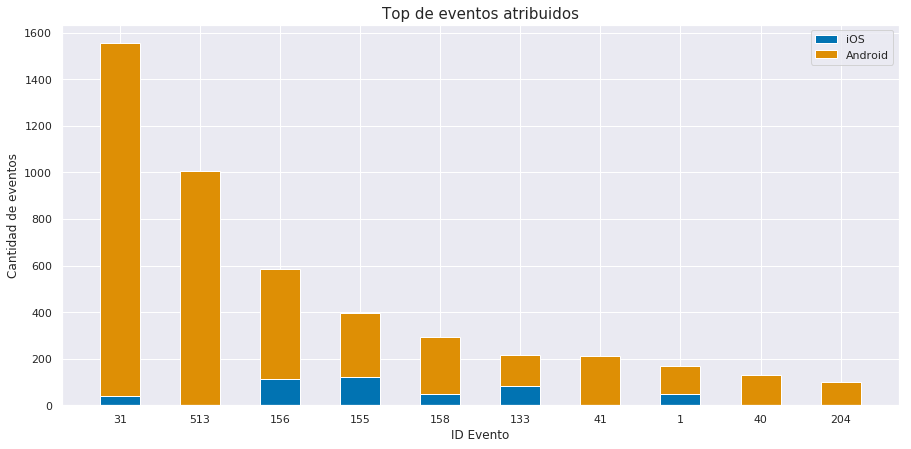

In [385]:
N = 10
os_1 = attributed_os.iloc[:,1]
os_2 = attributed_os.iloc[:,2]

label_ev = attributed_os["event_id"]
label_os = events["ref_type"].nunique()

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(15,7))

ax =fig.gca()
p1 = plt.bar(ind, os_1, width)
p2 = plt.bar(ind, os_2, width, bottom=os_1 )


plt.ylabel('Cantidad de eventos')
plt.xlabel('ID Evento')
plt.title('Top de eventos atribuidos',fontsize=15)
plt.xticks(ind, label_ev)
plt.legend((p1[0], p2[0]), ("iOS","Android"))

#autolabel_height(ax)
plt.show()

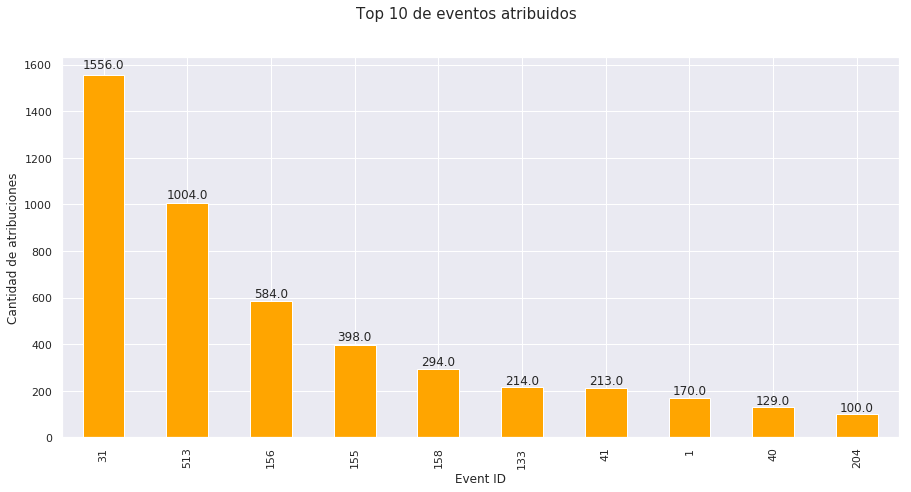

In [386]:
fig, ax1 = plt.subplots( figsize = (15,7), )

top_attributed = events[["event_id","attributed"]].groupby("event_id").sum().nlargest(10,columns = "attributed")
graf_barras = top_attributed.plot(kind = "bar",color = "Orange",ax=ax1)

fig.suptitle("Top 10 de eventos atribuidos",fontsize = 15)

ax1.set_xlabel("Event ID")
ax1.set_ylabel("Cantidad de atribuciones")
ax1.get_legend().remove()
autolabel_height(graf_barras)


## Eventos attribuidos más frecuentes categorizados por wifi

In [387]:
attributed_wifi = events.groupby(["event_id","wifi"])["attributed"]\
                  .sum()\
                  .reset_index()\
                  .pivot("event_id","wifi","attributed")\

attributed_wifi["total"] = attributed_wifi.sum(axis=1)

attributed_wifi = attributed_wifi.nlargest(10, columns = "total")

attributed_wifi.reset_index(inplace=True)

In [388]:
attributed_wifi

wifi,event_id,False,True,total
0,31,506.0,1045.0,1551.0
1,513,20.0,984.0,1004.0
2,156,175.0,409.0,584.0
3,155,133.0,265.0,398.0
4,158,101.0,193.0,294.0
5,133,94.0,120.0,214.0
6,204,23.0,77.0,100.0
7,159,10.0,50.0,60.0
8,239,0.0,18.0,18.0
9,134,2.0,10.0,12.0


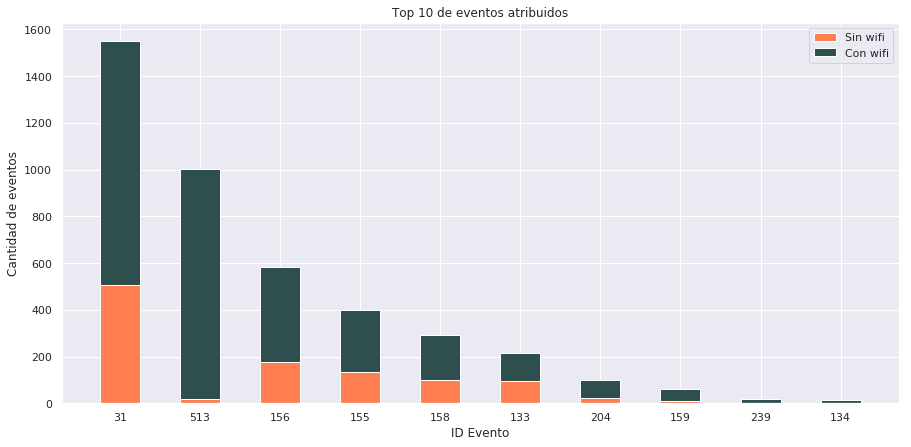

In [398]:
N = 10
group_1 = attributed_wifi.iloc[:,1]
group_2 = attributed_wifi.iloc[:,2]

label_ev = attributed_wifi["event_id"]

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(15,7))

ax =fig.gca()
p1 = plt.bar(ind, group_1, width,color = ("Coral"))
p2 = plt.bar(ind, group_2, width, bottom=group_1, color= "Darkslategray")


plt.ylabel('Cantidad de eventos')
plt.xlabel('ID Evento')
plt.title('Top 10 de eventos atribuidos')
plt.xticks(ind, label_ev)
plt.legend((p1[0], p2[0]), ("Sin wifi","Con wifi"))

#autolabel_height(ax)
plt.show()


## Eventos attribuidos más frecuentes categorizados por conexion

In [390]:
attributed_connect = events.groupby(["event_id","connection_type"])["attributed"]\
                  .sum()\
                  .reset_index()\
                  .pivot("event_id","connection_type","attributed")\

attributed_connect["total"] = attributed_connect.sum(axis=1)

attributed_connect = attributed_connect.nlargest(10, columns = "total")

attributed_connect.reset_index(inplace=True)

In [391]:
attributed_connect.fillna(0,inplace=True)

In [392]:
attributed_connect

connection_type,event_id,Cable/DSL,Cellular,Corporate,total
0,41,151.0,62.0,0.0,213.0
1,1,138.0,32.0,0.0,170.0
2,40,93.0,36.0,0.0,129.0
3,246,39.0,8.0,0.0,47.0
4,248,40.0,7.0,0.0,47.0
5,247,34.0,9.0,0.0,43.0
6,81,20.0,3.0,0.0,23.0
7,189,11.0,1.0,0.0,12.0
8,80,9.0,1.0,0.0,10.0
9,387,2.0,0.0,0.0,2.0


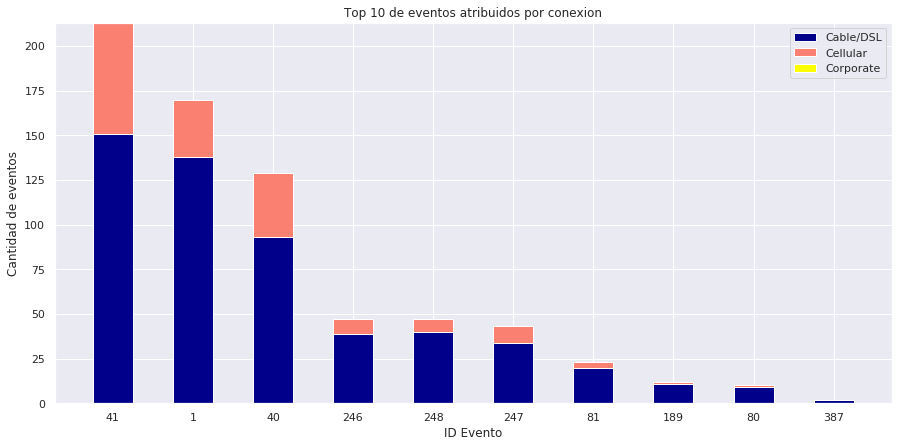

In [404]:
N = 10
group_1 = attributed_connect.iloc[:,1]
group_2 = attributed_connect.iloc[:,2]
group_3 = attributed_connect.iloc[:,3]

label_ev = attributed_connect["event_id"]

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(15,7))

ax =fig.gca()
p1 = plt.bar(ind, group_1, width,color = "Darkblue")
p2 = plt.bar(ind, group_2, width, bottom=group_1, color= "Salmon")
p3 = plt.bar(ind, group_3, width, bottom= group_1+group_2, color = "Yellow")


plt.ylabel('Cantidad de eventos')
plt.xlabel('ID Evento')
plt.title('Top 10 de eventos atribuidos por conexion')
plt.xticks(ind, label_ev)
plt.legend((p1[0], p2[0],p3[0]), ("Cable/DSL","Cellular","Corporate"))

#autolabel_height(ax)
plt.show()


## ¿Como se distribuyen los eventos más atribuidos segun la hora del dia?

#### Para lograr una visualización más amigable vamos a utilizar solo los primeros 5 eventos del top pidiendo que la cantidad de eventos sea mayor a 250

In [262]:
top_attributed = top_attributed[ top_attributed["attributed"] > 250 ]

In [263]:
filtro = ((events["event_id"].isin(top_attributed.index)) & (events["attributed"] == True))
columnas = ["date","event_id","attributed"]
events_hour = events[ filtro ][columnas]

In [264]:
events_hour.head()

,date,event_id,attributed
33587,2019-03-07 13:46:20.674,31,True
39124,2019-03-07 21:58:11.323,156,True
39125,2019-03-07 21:55:28.600,155,True
39126,2019-03-07 21:51:05.948,31,True
39127,2019-03-07 21:55:39.551,158,True


In [265]:
events_hour = events_hour.groupby( [pd.Grouper(key = "date",freq = "h"), "event_id"] ).count().reset_index()

In [266]:
heat = events_hour.pivot("date","event_id","attributed").reset_index()
heat["date"] = heat["date"].dt.hour  
heat = heat.groupby("date").agg("sum")

#### Comentario : Reordenar el eje para que los eventos queden ordenados de mayor a menor cantidad

Text(105.0, 0.5, 'Cantidad de atribuciones')

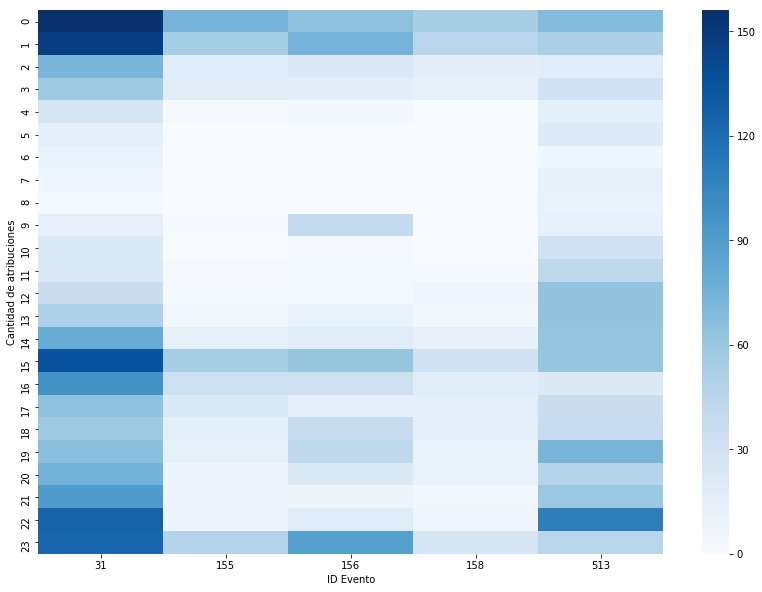

In [271]:
fig,ax = plt.subplots(figsize = (14,10))
sns.heatmap(heat,cmap = "Blues")
ax.set_xlabel("ID Evento")
ax.set_ylabel("Cantidad de atribuciones")

## Eventos - Dispositivos

### ¿Cúales son las marcas de dispositivos y modelos más populares dentro de los datos?

In [143]:
events["device_brand"].nunique()

250

In [144]:
events["device_model"].nunique()

2624

#### Se observa que se encuentran datos para 250 marcas de dispositivos y 2624 modelos distintos

## Marcas más populares entre los clientes de Jammp y las que más eventos realizan:

In [367]:
top_brands = events.groupby("ref_hash")["device_brand"].first()\
                   .value_counts().head(5)

In [368]:
top_brands_events = events.groupby("device_brand").agg({"ref_hash":"count"})\
                          .nlargest(5,columns="ref_hash")

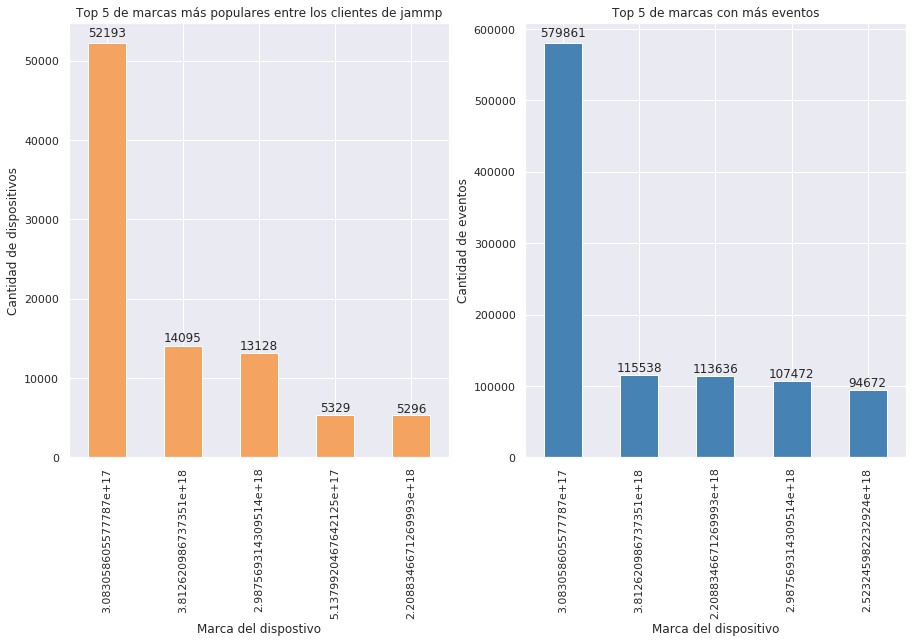

In [371]:
fig, ejes = plt.subplots( nrows = 1, ncols= 2, figsize = (15,8), )
ax1 = ejes[0]
ax2 = ejes[1]

graf_barras1 = top_brands.plot(kind = "bar",color = "Sandybrown",ax=ax1)
graf_barras2 = top_brands_events.plot(kind= "bar", color="Steelblue", ax=ax2)

ax1.set_title("Top 5 de marcas más populares entre los clientes de jammp",fontsize = 12)
ax1.set_xlabel("Marca del dispostivo")
ax1.set_ylabel("Cantidad de dispositivos")

ax2.set_title("Top 5 de marcas con más eventos")
ax2.set_xlabel("Marca del dispositivo")
ax2.set_ylabel("Cantidad de eventos")
ax2.get_legend().remove()

autolabel_height(graf_barras1)
autolabel_height(graf_barras2)

#### A partir del gráfico primer gráfico se denota una gran popularidad para el primer valor, teniendo casi 5 veces más dispositivos que su inmediato perseguidor, mientras que para los 2 siguientes hay una paridad más notoria hasta llegar a los demás valores que estan muy por debajo de los demás.

#### En el segundo grafico se mantienen  los dos primeros puestos del primer grafico, a partir del tercero hay una varianza entre los puestos, tanto así que el 4 valor del primer grafico no aparece entre los primeros 5 del segundo.

## Top 10 de modelos de dispositivos más populares entre los clientes de Jammp:

In [394]:
top_models = events.groupby("ref_hash")["device_model"].first()\
                   .value_counts().head(10)

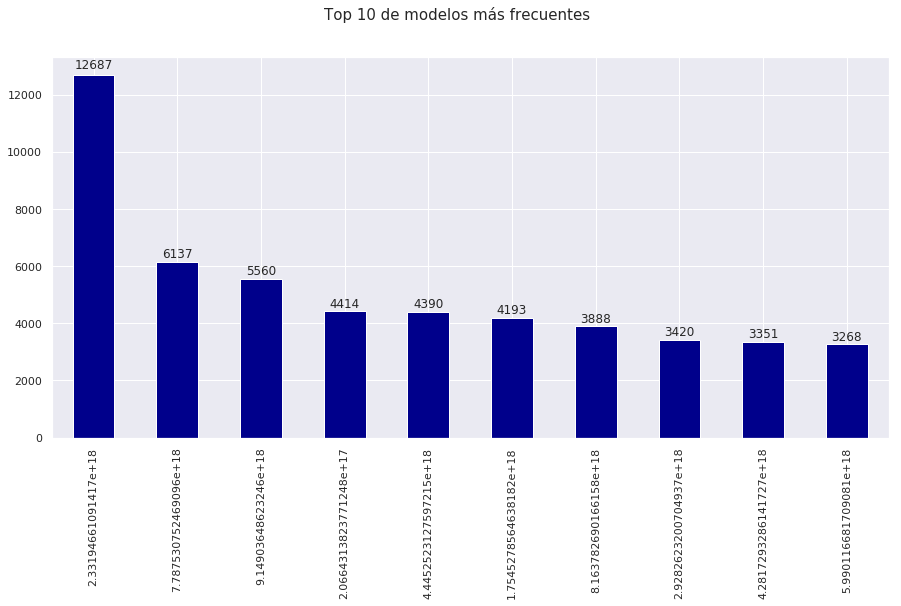

In [396]:
fig, ax1 = plt.subplots( figsize = (15,7), )

graf_barras = top_models.plot(kind = "bar",color = "DarkbLue",ax=ax1)

fig.suptitle("Top 10 de modelos más frecuentes",fontsize = 15)
autolabel_height(graf_barras)

#### Nuevamente se observa que el primer valor esta alejado del segundo, esta vez por casi el tripe. Para los demás integrantes se observa una leve disminución entre sus totales

## ¿Cuantos dispositivos distintos y cuales son los más frecuentes?

In [263]:
events["ref_hash"].nunique()

196049

## Top 10 de dispositivos que más eventos realizan entre los clientes de Jammp

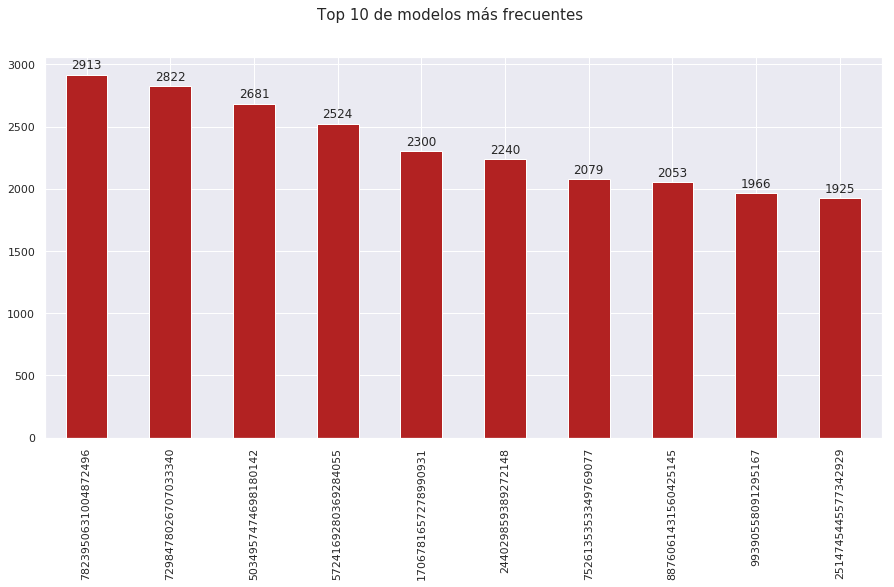

In [405]:
fig, ax1 = plt.subplots( figsize = (15,7), )

datos = events["ref_hash"].value_counts().head(10)
graf_barras = datos.plot(kind = "bar",color = "Firebrick",ax=ax1)

fig.suptitle("Top 10 de modelos más frecuentes",fontsize = 15)
autolabel_height(graf_barras)

## Carrier dispositivo

In [13]:
events["carrier"].nunique()

84

In [69]:
events["carrier"].isnull().sum()

1877989

In [70]:
top_carriers = events.groupby("ref_hash")["carrier"].first()\
                   .value_counts().head(5)

In [71]:
top_carriers

2.248157e+17    40601
1.179587e+18     7500
7.855224e+18     5150
6.948828e+18     2344
3.570805e+18      372
Name: carrier, dtype: int64

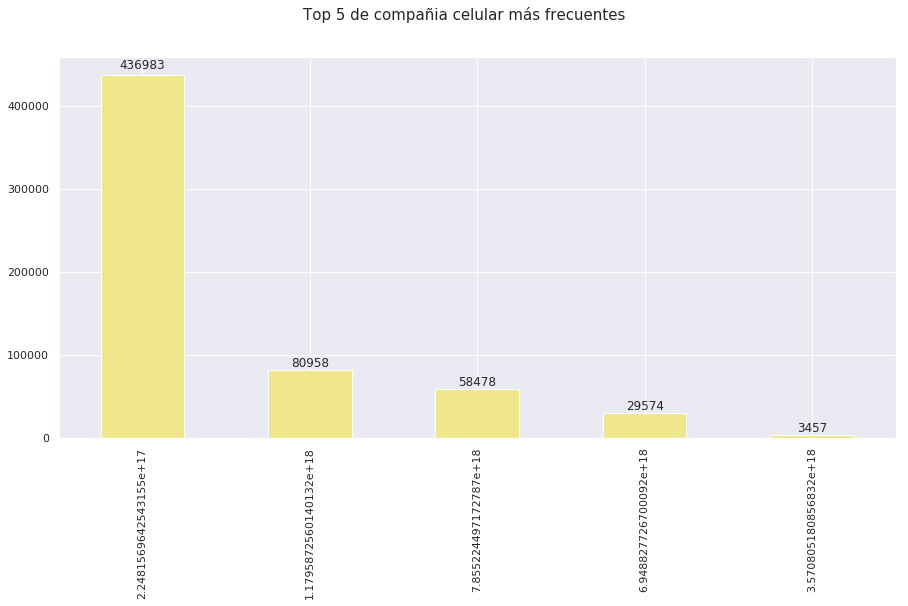

In [406]:
fig, ax1 = plt.subplots( figsize = (15,7), )

datos = events["carrier"].value_counts().head(5)
graf_barras = datos.plot(kind = "bar",color = "Khaki",ax=ax1)

fig.suptitle("Top 5 de compañia celular más frecuentes",fontsize = 15)
autolabel_height(graf_barras)

## ¿Como es el porcentaje de eventos totales y atribuidos según el sistema operativo ?

In [407]:
ev_attributed = events[events["attributed"] == True]

In [408]:
os_count = events.groupby("device_os").count()["date"]\
               .reset_index()\
               .sort_values(by= "date",ascending=False)\
               .rename(columns = {"date":"count"})

os_count

,device_os,count
3,7.531669e+18,389811
2,6.941825e+18,260861
0,2.748831e+18,6110
1,5.916187e+18,885


#### Los ultimos dos sistemas operativos tienen valores muy bajos por los que los uniré en una categoría "Otros"

In [409]:
new_row = pd.DataFrame(data = {
    'device_os' : ['Otros'],
    'count' : [os_count['count'][2:].sum()]
})

In [410]:
os_count = pd.concat([os_count[:2],new_row])

In [411]:
os_count

,device_os,count
3,7.53167e+18,389811
2,6.94182e+18,260861
0,Otros,6995


In [412]:
os_count_attributed =ev_attributed["device_os"].value_counts()
os_count_attributed

7.531669e+18    580
6.941825e+18    130
Name: device_os, dtype: int64

Text(0.5, 0.98, 'Comparación de porcentajes de eventos totales segun sistema operativo')

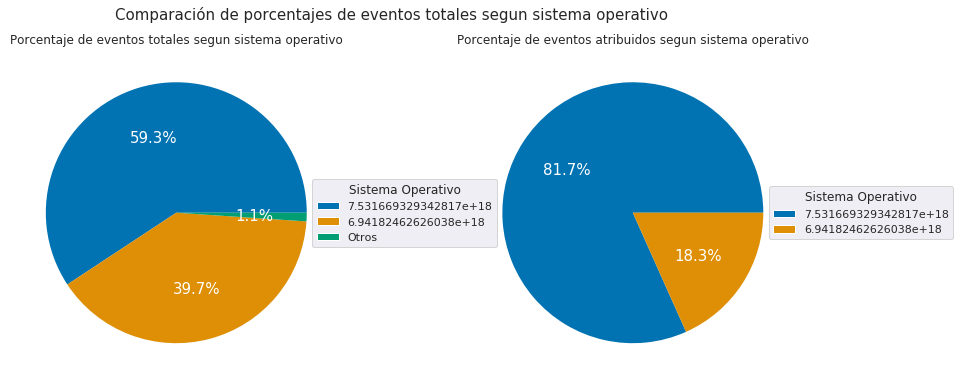

In [415]:
fig, ejes = plt.subplots(nrows = 1,ncols = 2, figsize = (15,6), )
ax1 = ejes[0]
ax2 = ejes[1]

porc1,text1,autotext1 = ax1.pie(os_count["count"], autopct = autolabel_pct)
porc2,text2,autotext2 = ax2.pie(os_count_attributed, autopct = autolabel_pct)


for p in porc1+porc2:
    p.set_linewidth(0)
    p.set_edgecolor("Orange")

for t in autotext1+autotext2:
    t.set_fontsize(15)
    t.set_color("white")

ax1.set_title("Porcentaje de eventos totales segun sistema operativo",fontsize = 12)
ax1.legend(graf_torta1[0], os_count["device_os"],
          title="Sistema Operativo",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0, 1))

ax2.set_title("Porcentaje de eventos atribuidos segun sistema operativo",fontsize = 12)
ax2.legend(graf_torta2[0], os_count_attributed.index,
          title="Sistema Operativo",
          loc="center left",
          bbox_to_anchor=(0.9,0,0,1))

fig.suptitle("Comparación de porcentajes de eventos totales segun sistema operativo",fontsize = 15)


#### Comentario : Buscar la forma de cambiar la separación de los graficos con los titulos

### Se puede observar que en los datos de los eventos totales aparecen sistemas dos sistemas operativos englobados en "Otros" con un porcentaje muy bajo de eventos. Luego al filtrar los eventos atribuidos a Jammp, esta categoría desaparece y se agranda la brecha entre el sistema con mayor prescencia y el segundo, por lógica se deduce que Android es el sistema operativo con más presencia seguido por iOS teniendo en cuenta el procentaje total de dispositivos que tiene cada sistema globalmente 

In [416]:
os_count = events["ref_type"].value_counts()

In [417]:
os_count

1891515180541284343    1882743
1494519392962156891     611680
Name: ref_type, dtype: int64

In [418]:
os_count_attributed = ev_attributed["ref_type"].value_counts()

Text(0.5, 0.98, 'Comparación de porcentajes de eventos totales segun sistema operativo')

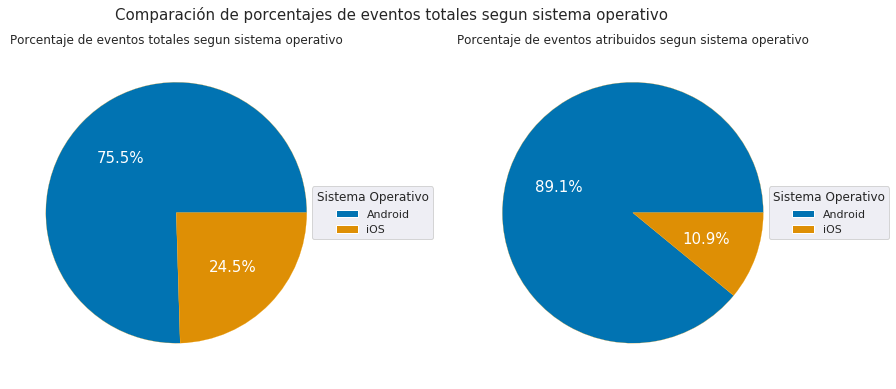

In [421]:
fig, ejes = plt.subplots(nrows = 1,ncols = 2, figsize = (15,6), )
ax1 = ejes[0]
ax2 = ejes[1]

porc1,text1,autotext1 = ax1.pie(os_count, autopct = autolabel_pct)
porc2,text2,autotext2 = ax2.pie(os_count_attributed, autopct = autolabel_pct)


for p in porc1+porc2:
    p.set_linewidth(0.2)
    p.set_edgecolor("Orange")

for t in autotext1+autotext2:
    t.set_fontsize(15)
    t.set_color("white")


ax1.set_title("Porcentaje de eventos totales segun sistema operativo",fontsize = 12)
ax1.legend(graf_torta1[0], ("Android","iOS"),
          title="Sistema Operativo",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0, 1))

ax2.set_title("Porcentaje de eventos atribuidos segun sistema operativo",fontsize = 12)
ax2.legend(graf_torta2[0], ("Android","iOS"),
          title="Sistema Operativo",
          loc="center left",
          bbox_to_anchor=(0.9,0,0,1))

fig.suptitle("Comparación de porcentajes de eventos totales segun sistema operativo",fontsize = 15)


## Eventos - Aplicaciones

## ¿Cúantos aplicaciones distintas y cuales son las que más eventos realizan?

In [422]:
events["application_id"].nunique()

269

#### ¿Alguna tiene datos nulos?

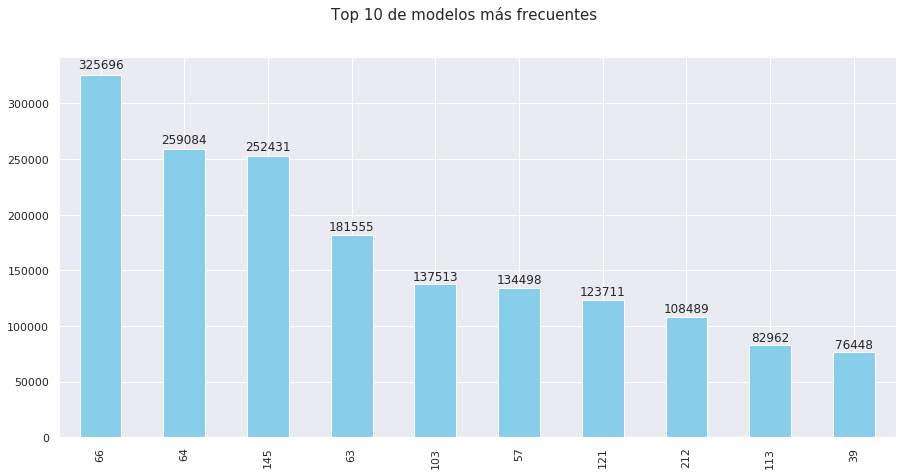

In [424]:
fig, ax1 = plt.subplots( figsize = (15,7), )

datos = events["application_id"].value_counts().head(10)
graf_barras = datos.plot(kind = "bar",color = "Skyblue",ax=ax1)

fig.suptitle("Top 10 de modelos más frecuentes",fontsize = 15)
autolabel_height(graf_barras)

## ¿Cuantos lenguajes de dispositivos presentes y cuales son los más frecuentes?

In [4]:
events["device_language"].value_counts().head()

6.977049e+18    745898
3.301378e+18    589865
9.028383e+18    388832
6.804428e+18    340624
4.621024e+18    150143
Name: device_language, dtype: int64

In [5]:
events["device_language"].nunique()

186

#### 186 Lenguajes de dispositivo

## ¿Cuantos codigos de pais ?

In [19]:
events["device_countrycode"].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

#### Un único código de país, igual que en auctions

In [63]:
events["device_city"].nunique()

127

In [65]:
events["device_city"].value_counts().head()

3.800080e+18    561876
2.551781e+18     11193
3.258215e+18      4442
8.223209e+18      4393
8.578627e+17      2497
Name: device_city, dtype: int64

In [64]:
events["device_city"].isnull().sum()

1879725

## ¿Cual es el evento que predomina según hora del dia ?

In [425]:
events_hour = events[["date","ref_hash","event_id","attributed"]].copy()
events_hour["date"] = events_hour["date"].dt.hour

In [426]:
events_hour = events_hour.groupby(["date", "event_id"])\
                         .agg({"ref_hash":"count","attributed":"sum"}).reset_index()
                           

In [427]:
#Obtengo el evento que más se repite por hora

events_hour = events_hour.loc[ events_hour.groupby(["date"])["ref_hash"].idxmax() ]

In [428]:
events_hour.set_index("date",inplace = True)

In [431]:
def autolabel_h(grafico,etiquetas, xpos="center"):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off    
    
    for barra in grafico.patches:
        height = barra.get_height()
        grafico.text( barra.get_width()+ 1300, barra.get_y(),
                etiquetas.pop(0), ha=ha[xpos], va='bottom',color="Firebrick")

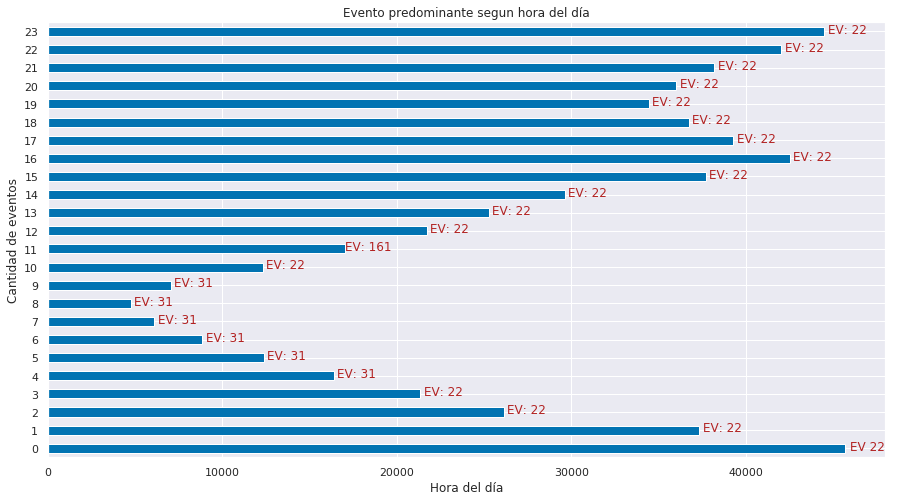

In [432]:
# Estoy buscando una manera de reemplazar las etiquetas con colores dependiendo del evento


fig,ax = plt.subplots(nrows = 1,ncols =1,figsize = (15,8))

grafico = events_hour[["ref_hash"]].plot(kind="barh",ax=ax)

ax.set_xlabel("Hora del día")
ax.set_ylabel("Cantidad de eventos")
ax.set_title("Evento predominante segun hora del día")
ax.get_legend().remove()

valores = events_hour["event_id"].values
etiquetas = ["EV 22"]
for valor in valores :
    etiquetas.append( "EV: {}".format(valor))
    
autolabel_h(grafico,etiquetas)